In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
# matplotlib.use('TkAgg')
# matplotlib.interactive(True)
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import glob
from PIL import Image

In [2]:
# # IMG#1:
# IMG_1_loc = './../../intraoperativeperformance/Autoencoder_Analysis/reconstructions/'
# # IMG_1_tag = '420'
# # imgs_1 = glob.glob(IMG_1_loc)
# # imgs_1 = [v for v in imgs_1 if ((IMG_1_tag in v) and ('recon' in v))]
# imgs_1 = [IMG_1_loc+'0_70_5_x_224_x_224_.jpg',
#           IMG_1_loc+'0_200_3_x_112_x_112_.jpg',
#           IMG_1_loc+'0_110_1_x_112_x_112_.jpg',
#           IMG_1_loc+'0_410_1_x_56_x_56_.jpg',
#           IMG_1_loc+'0_180_1_x_28_x_28_.jpg',
#          ]

# print('Imgs recovered: '+str(len(imgs_1)))

# for img_loc in imgs_1:
#     img = cv2.imread(img_loc)
#     plt.figure()
#     plt.imshow(img)

In [3]:
# Mask-RCNN reconstructions

In [4]:
FOLDER_LOC_RECON = '/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/'
all_imgs_recon = glob.glob(FOLDER_LOC_RECON+'/*.jpg')
print(len(all_imgs_recon))
# print((all_imgs_recon))

43


In [5]:
# create a list of all the masks:
masks = []
orig = []
for i, img_name in enumerate(all_imgs_recon):
    if ('_mask_' in img_name):
        masks.append(img_name)
    else:
        orig.append(img_name)
        
print('Original files extracted: {}'.format(len(orig)))
print('Masks extracted: {}'.format(len(masks)))

Original files extracted: 11
Masks extracted: 32


In [6]:
cases = [v.split('/')[-1].split('.')[0] for v in orig]
print(cases)

['2100_frame0307363073', '2100_frame0357723576', '2100_frame00033033', '2100_frame0335401352', '2100_frame0232042320', '2103_frame001350135', '2100_frame0347823477', '2100_frame0307463074', '2100_frame007980798', '3QTQB68JK1JRUOC0_14V361U52_frame0340021268', '1190_frame0209521923']


/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0307363073_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0357723576_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame00033033_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0335401352_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0232042320_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2103_frame001350135_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0347823477_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame0307463074_MASK.jpg
/home/shujakhalid/Desktop/Presentations/papert/mask-rcnn-orig-segmented-mask/2100_frame007980798_MASK.jpg
/home/shujakhalid/Desktop/Presentations/p

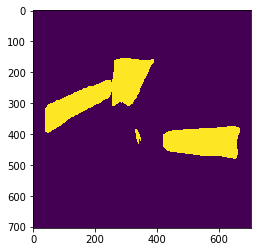

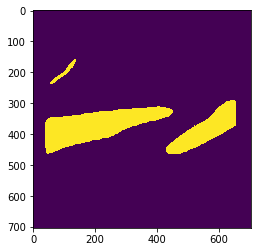

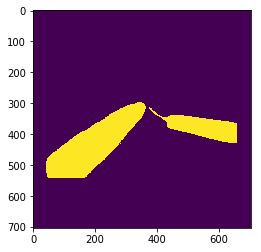

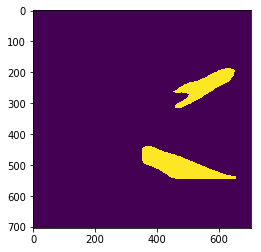

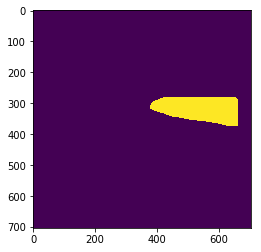

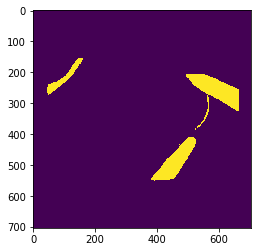

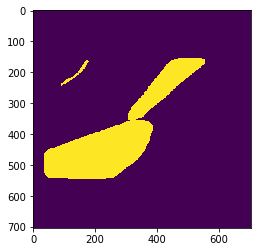

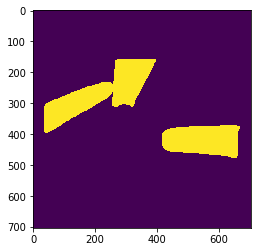

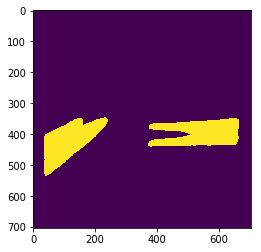

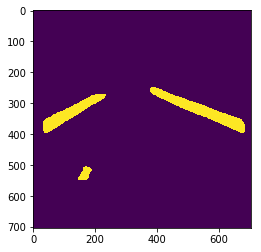

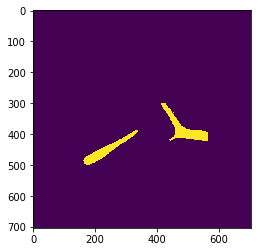

In [23]:
img_sum = np.zeros((704,704))
for case in cases:
    for i, img_name in enumerate(masks):
        if (case in img_name):
            img_sum += np.mean(cv2.imread(img_name), axis=2)
    img_sum = img_sum/np.max(img_sum) 
    img_sum[img_sum>0.2] = 255.0 # Set threshold higher to ignore pixelation
    cv2.imwrite(FOLDER_LOC_RECON+case+'_MASK.jpg', img_sum)
    print(FOLDER_LOC_RECON+case+'_MASK.jpg')
    plt.figure()
    plt.imshow(img_sum)
    img_sum = np.zeros((704,704))

print()
print('Extraction complete!')
print()

In [ ]:
# Good cases

# Bad cases
